In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [2]:
# Loading the CSV file
data = pd.read_csv('data_hw3.csv')

In [3]:
# Sorting the data by 'Propellant age (Weeks) x' column in ascending order
data.sort_values(by='Propellant age (Weeks) x', inplace=True)

In [4]:
# Extracting the features (x) and target (y) from the dataset
x = data['Propellant age (Weeks) x'].values.reshape(-1, 1)
y = data['Shear strength (MPa) y'].values

In [5]:
# Creating a DataFrame to store the results
results_lasso = pd.DataFrame()

In [6]:
# Lasso regularization with different lambdas
for alpha in [0, 1e-2, 1e-4]:
    # Creating a Polynomial Regression model with Lasso regularization
    model = make_pipeline(PolynomialFeatures(degree=2), Lasso(alpha=alpha))

    # Fitting the model
    model.fit(x, y)

    # Predicting using the model
    y_pred = model.predict(x)

    # Storing the results in the DataFrame
    results_lasso[f'Lambda={alpha}'] = y_pred

c:\Users\Omkar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\Omkar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Omkar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.680e+00, tolerance: 3.864e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers i

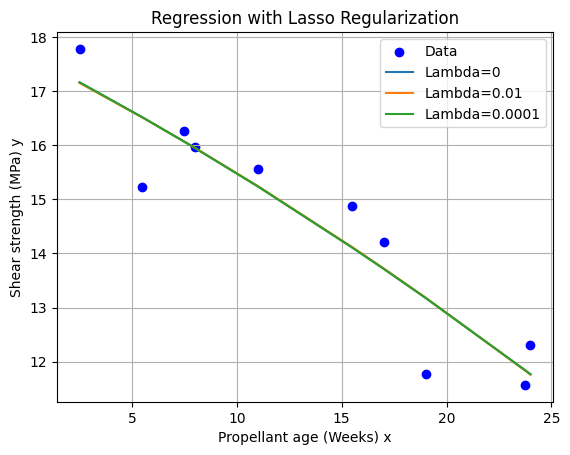

In [7]:
# Plotting the original data points
plt.scatter(x, y, label='Data', color='b')

# Plotting the regression lines for different lambdas
for column in results_lasso.columns:
    plt.plot(x, results_lasso[column], label=column)

plt.xlabel('Propellant age (Weeks) x')
plt.ylabel('Shear strength (MPa) y')
plt.title('Regression with Lasso Regularization')
plt.legend()
plt.grid(True)
plt.show()